In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import layers
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
import seaborn as sns
sns.set()

## Exercise 5b: (Extra): EMNIST transfer learning (8p)

Train a convolutional EMNIST letters classification model (use data set https://www.tensorflow.org/datasets/catalog/emnist#emnistletters but read the EMNIST data set introduction, too). Experiment with transfer learning by reusing the convolutional base of the EMNIST model to classify standard MNIST digit images. Do you get any benefit compared to a model trained on NMIST data set? Why/why not? 

In [1]:
from extra_keras_datasets import emnist
(x_train, y_train), (x_test, y_test) = emnist.load_data(type='letters')

INFO:root:Loading dataset = emnist


In [3]:
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
model = keras.models.Sequential()

model.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=True, padding='valid', input_shape=(28, 28, 1,), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=False, padding='valid', activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(27, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 6)           900       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 6)           24        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 6)           0

In [6]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/20
1950/1950 [==============================] - 24s 12ms/step - loss: 0.7519 - acc: 0.7678 - val_loss: 0.3554 - val_acc: 0.8833
Epoch 2/20
1950/1950 [==============================] - 24s 12ms/step - loss: 0.3958 - acc: 0.8708 - val_loss: 0.2918 - val_acc: 0.9037
Epoch 3/20
1950/1950 [==============================] - 24s 12ms/step - loss: 0.3407 - acc: 0.8893 - val_loss: 0.2731 - val_acc: 0.9070
Epoch 4/20
1950/1950 [==============================] - 23s 12ms/step - loss: 0.3144 - acc: 0.8971 - val_loss: 0.2451 - val_acc: 0.9176
Epoch 5/20
1950/1950 [==============================] - 23s 12ms/step - loss: 0.2961 - acc: 0.9016 - val_loss: 0.2324 - val_acc: 0.9224
Epoch 6/20
1950/1950 [==============================] - 24s 12ms/step - loss: 0.2850 - acc: 0.9053 - val_loss: 0.2321 - val_acc: 0.9212
Epoch 7/20
1950/1950 [==============================] - 23s 12ms/step - loss: 0.2741 - acc: 0.9084 - val_loss: 0.2350 - val_acc: 0.9215
Epoch 8/20
1950/1950 [==========================

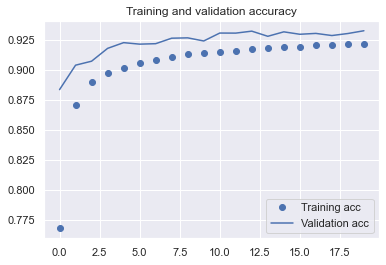

In [7]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.show()

In [8]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [18]:
from keras import optimizers

model1 = keras.models.Sequential()

model1.add(model)# Is it okay to just write it like that?

model1.add(BatchNormalization(axis=-1))
model1.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model1.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=False, padding='valid', activation='relu'))
model1.add(BatchNormalization(axis=-1))
model1.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(100))
model1.add(Activation('relu'))

model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model1.summary()

ValueError: Input 0 of layer max_pooling2d_2 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 27]

How can I use my own model for transfer modeling, without installing a pre-made one.

In [13]:
hist1 = model1.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/20


ValueError: in user code:

    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [64, 28, 28, 1]


In [19]:
acc = hist1.history['acc']
val_acc = hist1.history['val_acc']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.show()

NameError: name 'hist1' is not defined

Unfortunatelly, I could not finish this assignment on time. Could you please write me, what mistakes did I make?